In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
import tensorflow as tf
import os

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 2618 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
data_iterator

In [13]:
batch = data_iterator.next()

In [14]:
len(batch)

2

In [15]:
 batch[1]

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

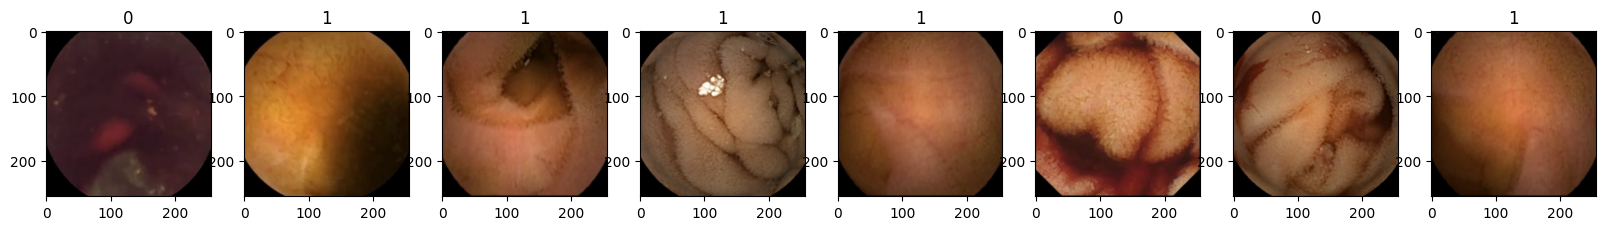

In [16]:
# 0 = bleeding 1= non bleeding
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
scaled=batch[0]

In [18]:
data = data.map(lambda x,y: (x/255, y))

In [19]:
data.as_numpy_iterator().next()[0].max()

1.0

In [20]:
len(data)

82

In [21]:
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [22]:
val_size+train_size+test_size

82

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
model = Sequential()

In [26]:

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
58/58 [==============================] - 32s 538ms/step - loss: 0.5621 - accuracy: 0.7177 - val_loss: 0.4132 - val_accuracy: 0.8125
Epoch 2/20
58/58 [==============================] - 31s 532ms/step - loss: 0.3008 - accuracy: 0.8723 - val_loss: 0.2140 - val_accuracy: 0.9199
Epoch 3/20
58/58 [==============================] - 31s 538ms/step - loss: 0.2023 - accuracy: 0.9230 - val_loss: 0.1867 - val_accuracy: 0.9316
Epoch 4/20
58/58 [==============================] - 31s 533ms/step - loss: 0.1180 - accuracy: 0.9585 - val_loss: 0.1079 - val_accuracy: 0.9629
Epoch 5/20
58/58 [==============================] - 31s 533ms/step - loss: 0.0686 - accuracy: 0.9752 - val_loss: 0.0919 - val_accuracy: 0.9629
Epoch 6/20
58/58 [==============================] - 31s 539ms/step - loss: 0.0440 - accuracy: 0.9887 - val_loss: 0.1232 - val_accuracy: 0.9512
Epoch 7/20
58/58 [==============================] - 32s 540ms/step - loss: 0.0295 - accuracy: 0.9930 - val_loss: 0.1266 - val_accuracy: 0.9668

In [32]:
hist.history

{'loss': [0.5621322989463806,
  0.3008432388305664,
  0.20230981707572937,
  0.11799977719783783,
  0.06855694949626923,
  0.04404046759009361,
  0.029510246589779854,
  0.03326142579317093,
  0.022778095677495003,
  0.004887023009359837,
  0.001949824276380241,
  0.0014044364215806127,
  0.003866079030558467,
  0.02603870816528797,
  0.01494416780769825,
  0.010357129387557507,
  0.006933645345270634,
  0.0007071984582580626,
  0.00030167101067490876,
  0.00041741409222595394],
 'accuracy': [0.7176724076271057,
  0.8723060488700867,
  0.9229525923728943,
  0.9585129022598267,
  0.975215494632721,
  0.9886853694915771,
  0.9929956793785095,
  0.9897629022598267,
  0.9929956793785095,
  1.0,
  1.0,
  1.0,
  0.9994612336158752,
  0.9892241358757019,
  0.9962284564971924,
  0.9967672228813171,
  0.9973060488700867,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.41321495175361633,
  0.21400901675224304,
  0.18665926158428192,
  0.1078958809375763,
  0.09193021059036255,
  0.12317203730344772,
  0.1

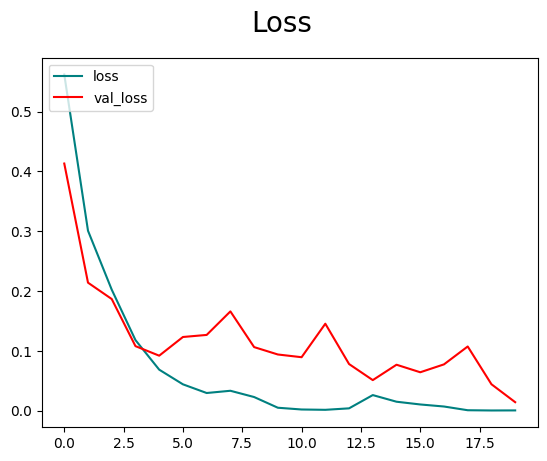

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

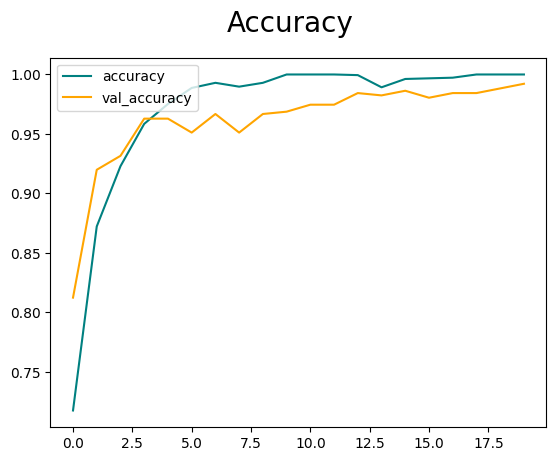

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 145ms/step


In [38]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9596774, shape=(), dtype=float32) tf.Tensor(0.96747965, shape=(), dtype=float32) tf.Tensor(0.964, shape=(), dtype=float32)


In [66]:
F1 = 2*(pre.result()*re.result()/(pre.result()+re.result()))
print("F1 sore is ", F1)

F1 sore is  tf.Tensor(0.9635627, shape=(), dtype=float32)


In [39]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [40]:
import cv2

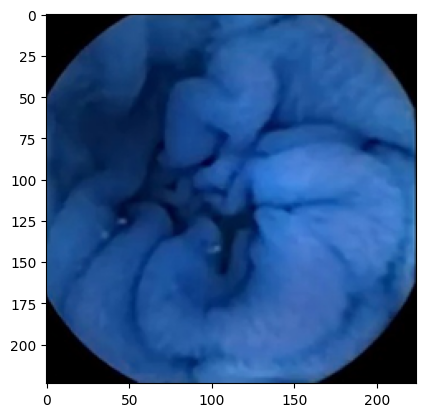

In [67]:
img = cv2.imread('nb.png')
plt.imshow(img)
plt.show()

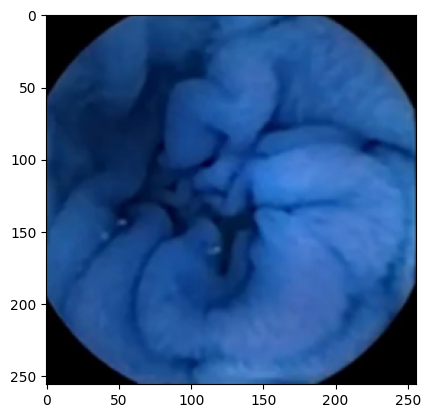

In [68]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [69]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 26ms/step


In [70]:
yhat

array([[0.9999997]], dtype=float32)

In [50]:
if yhat > 0.01: 
    print(f'Predicted class is non bleeding')
else:
    print(f'Predicted class is bleeding')

Predicted class is bleeding


In [51]:
from tensorflow.keras.models import load_model

In [52]:
model.save(os.path.join('models','bleeding_nonbleeding.h5'))

In [53]:
new_model = load_model(os.path.join('models','bleeding_nonbleeding.h5'))

In [54]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 59ms/step


array([[8.991758e-07]], dtype=float32)

In [56]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [61]:
import os
import numpy as np
from PIL import Image  # You may need to install the Pillow library
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_data_dir = 'test'  # Use the same directory as your training/validation data

# Get a list of subdirectories in the test dataset directory
test_dataset_folders = [folder for folder in os.listdir(test_data_dir) if os.path.isdir(os.path.join(test_data_dir, folder))]

# Initialize lists to store image data and file names
prediction_images = []
image_names = []

# Process each subdirectory (test dataset folder)
for test_folder in test_dataset_folders:
    # Construct the full path to the test dataset folder
    test_folder_path = os.path.join(test_data_dir, test_folder)

    # Get a list of all PNG image files in the folder
    image_files = [f for f in os.listdir(test_folder_path) if f.endswith('.png')]

    # Process each image in the folder
    for image_file in image_files:
        # Construct the full path to the image
        image_path = os.path.join(test_folder_path, image_file)
        image_height = 256  # Replace with the actual height of your images
        image_width = 256 

        # Open and process the image (e.g., resize to match the model's input shape)
        img = Image.open(image_path)
        img = img.resize((image_width, image_height))

        # Perform any necessary preprocessing here

        # Append the processed image to the list
        prediction_images.append(np.array(img))  # Assuming you want to store images as NumPy arrays

        # Append the image name to the list
        image_names.append(image_file)

# Make predictions on the processed images using the trained image classification model
predictions = new_model.predict(np.array(prediction_images))  # Assuming your model takes NumPy arrays as input

# Round the predictions to get binary class labels (0 or 1)
predicted_labels = np.round(predictions).astype(float)

# Create a DataFrame to store image names and predicted class labels
df = pd.DataFrame({
    'Image Name': image_names,
    'Predicted Class Label': predicted_labels.flatten()  # Flatten the predictions to match the DataFrame shape
})

# Save the DataFrame to an Excel file
excel_filename = 'predictions.xlsx'
df.to_excel(excel_filename, index=False)

print(f"Predictions saved to {excel_filename}")


18/18 [==============================] - 3s 150ms/step
Predictions saved to predictions.xlsx


In [62]:
predictions

array([[0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [0.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [0.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [0.000000e+00],
       [1.000000e+00],
       [0.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [0.000000e+00],
       [1.0